In [111]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import detectorgeometry_071719 as geom_new
reload(geom_new)

<module 'detectorgeometry_071719' from 'detectorgeometry_071719.pyc'>

[3.66142630e-05 1.00664485e-04 1.10633290e-04 9.96617951e-05
 1.20538996e-04 5.22051613e-05 2.32339203e-05 3.48614441e-05
 4.62006921e-05 9.77121876e-05 1.93541442e-05 2.18369005e-05
 6.62992347e-05 3.06776454e-05 8.56805946e-05 3.16499088e-05
 1.24529723e-04 7.83422235e-05 1.15602540e-04 3.26627960e-05
 9.06082706e-05 8.62268296e-05 7.32338662e-05 1.10339983e-04
 8.84957879e-05 7.97302724e-05 4.75664585e-05 9.32947463e-05
 2.43754846e-05 1.21583367e-04] [0.68606433 5.91602239 3.37371608 4.00151977 5.35320483 3.34890995
 3.64733462 2.35609106 1.5586004  3.47161553 4.48118459 3.19918708
 5.42922607 0.78872129 0.6812282  5.26110329 1.70139356 2.63621766
 5.36658138 3.64058824 1.04959167 5.86316731 5.01732132 1.73570009
 4.09668372 3.28616344 3.49926961 4.15090748 6.04158812 3.29249141]
1.900386815827438 [ 0.68606433 -0.36716291  0.23212342  0.85992712 -0.92998047  0.20731729
  0.50574197 -0.78550159  1.5586004   0.33002287  1.33959193  0.05759443
 -0.85395924  0.78872129  0.6812282  -1.0

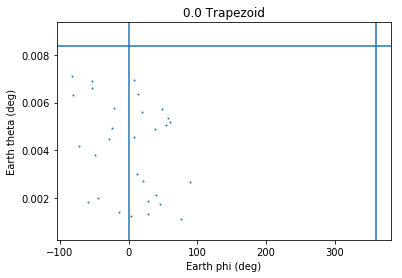

In [112]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 30 # number of samples

theta_src = radians(0)
area = geom_trap.Area(theta_src,h,R,theta_view, N)
A, e_phi, e_theta, view_angle, exit_angle, norm, e_dot= area.event_retention()
earth_t_min, earth_t_max, phi_E_min, phi_E_max = area.earth_patch(area.t_src,area.phi_src, area.th_v)
r_x, r_y, r_z = area.coords(area.t_src, area.phi_src + np.pi) 
t_e,phi_e = area.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
e_x,e_y,e_z = area.coords(t_e,phi_e)
dot = area.dot_prod(e_x,e_y,e_z,r_x, r_y,r_z)
view_angle,exit_angle, flight_path = area.view_angle_dist_det(e_x,e_y,e_z,r_x, r_y,r_z)

print A, e_phi, view_angle
plt.scatter(degrees(e_phi), degrees(e_theta),s=1)
plt.xlabel("Earth phi (deg)")
plt.ylabel("Earth theta (deg)")
plt.axhline(degrees(earth_t_min))
plt.axhline(degrees(earth_t_max))
plt.axvline(degrees(phi_E_min))
plt.axvline(degrees(phi_E_max))

# plt.scatter(phi_e, theta_e,s=1)
# plt.xlabel("Earth phi (rad)")
# plt.ylabel("Earth theta (rad)")
# plt.axhline(min(samp_t_e))
# plt.axhline(max(samp_t_e))
# plt.axvline(min(samp_phi_e))
# plt.axvline(max(samp_phi_e))

plt.title(str(round(degrees(theta_src),1))+" Trapezoid")
plt.ylim(0.8*min(degrees(samp_t_e) ),1.2*max(degrees(samp_t_e) ))

plt.show()


In [67]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 10000000 # number of samples
start = 0 # minimum source declination in degrees
end = 10 # maximum source declination in degrees
steps= 30 # divisions indeclination used to generate plot

areas1=[]
areas2=[]
for j in range(0,steps):
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, norm, e_dot= area2.event_retention()
#     earth_t_min, earth_t_max, phi_E_min, phi_E_max = area2.earth_patch(area2.t_src,area2.phi_src, area2.th_v)
#     earth_t =area2.thetaE_nadir(theta)
#     print np.arcsin((R+h) * np.sin(theta) / R)
#     print 2*np.pi* (h * np.tan(theta)) 
#     print (2*np.pi*np.sin(earth_t)*R)
#     print earth_t , earth_t_min, earth_t_max, phi_E_min, phi_E_max
    
    areas1.append(A1)
    areas2.append(A2)
    print degrees(theta),A1,A2
    print "   "


0.0 1.6918211516044335 1.8100579016094576
   
0.3333333333333333 1.2688442811570686 6.502985407661404
   
0.6666666666666666 1.4097545896608188 2.925477429219268
   
1.0 1.409633917452849 1.9203403409963793
   
1.3333333333333333 1.268518156663396 1.5647915122047817
   
1.6666666666666667 0.5636990270888305 1.4625378706072092
   
2.0 0.9862882138183802 1.4052887727129761
   
2.3333333333333335 1.4086683018228616 1.3688789967419572
   
2.6666666666666665 1.2674778034959835 1.3461837479199732
   
3.0000000000000004 1.267107947369648 1.3310935015894356
   
3.3333333333333335 1.1259518180787889 1.3173929427205402
   
3.6666666666666665 0.8441601710172656 1.3068638424555625
   
4.0 0.42191362139699173 1.298469878004169
   
4.333333333333333 1.1246211951078886 1.2939432498421162
   
4.666666666666667 1.4051228587417421 1.2876336704437443
   
5.0 0.8426561619464855 1.2846918686045583
   
5.333333333333333 1.5440451410376874 1.280720190542926
   
5.666666666666667 1.4028848239471616 1.27612839

[]

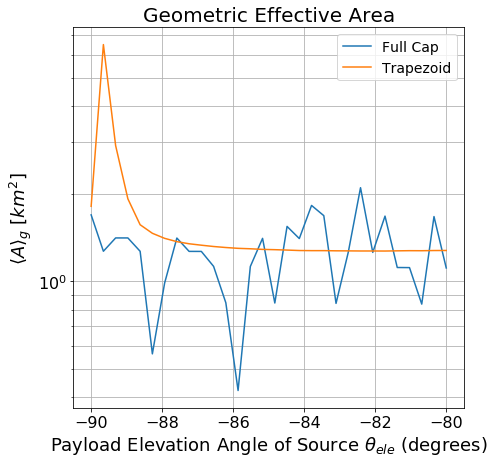

In [68]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x = np.linspace(start-90,end-90,steps)

ax.plot(x, areas1)
ax.plot(x, areas2)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-10,0)  
legend = ax.legend(["Full Cap", "Trapezoid"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()